### Description
The NOAA Merged Land Ocean Global Surface Temperature Analysis Dataset (NOAAGlobalTemp) merges two dataset to form one land–ocean surface temperature analysis (formerly known as MLOST).NOAAGlobalTEmp consists of a spatially gridded (5° × 5°) global surface temperature dataset, with monthly resolution from January 1880 to present. We combine a global sea surface (water) temperature (SST) dataset with a global land surface air temperature dataset into this merged dataset of both the Earth’s land and ocean surface temperatures, currently as version v5. The Extended Reconstructed Sea Surface Temperature (ERSST) version 5 provides the foundational SST observations. The land surface air temperature observations come from the Global Historical Climatology Network Monthly (GHCN-Monthly) database, version 4.

*Reference* https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php

### Anomaly
The term temperature anomaly means a departure from a reference value or long-term average. A positive anomaly indicates that the observed temperature was warmer than the reference value, while a negative anomaly indicates that the observed temperature was cooler than the reference value.

### Why?
Absolute estimates of global average surface temperature are difficult to compile for several reasons. Some regions have few temperature measurement stations (e.g., the Sahara Desert) and interpolation must be made over large, data-sparse regions. In mountainous areas, most observations come from the inhabited valleys, so the effect of elevation on a region's average temperature must be considered as well. For example, a summer month over an area may be cooler than average, both at a mountain top and in a nearby valley, but the absolute temperatures will be quite different at the two locations. The use of anomalies in this case will show that temperatures for both locations were below average.

Using reference values computed on smaller [more local] scales over the same time period establishes a baseline from which anomalies are calculated. This effectively normalizes the data so they can be compared and combined to more accurately represent temperature patterns with respect to what is normal for different places within a region.

For these reasons, large-area summaries incorporate anomalies, not the temperature itself. Anomalies more accurately describe climate variability over larger areas than absolute temperatures do, and they give a frame of reference that allows more meaningful comparisons between locations and more accurate calculations of temperature trends.

In [89]:
import plotly.express as px

In [45]:
%matplotlib inline
import xarray as xr
import pandas as pd
import numpy as np
from scipy.stats import kstest
import seaborn as sns

nc = xr.open_dataset('./NOAAGlobalTemp.nc')

The original data was stored as xarray which is a combination of data and metadata, here, we would like to transform it a relational data such as pandas(Dataframe) for in case of furthur analysis

In [4]:
nc

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, time: 1690, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2020-10-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (time, z, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    project:                          NOAAGlobalTemp 
    platform:                        Ships, moored buoys, surface drifting bu...
    instrument:                      Conventional thermometers
    history:                         Version 5.0.0, blending ERSST V5 and GHC...
    comment:                         Merged land ocean surface temperature an...
    product_version:                 5.0.0
    source:                          NOAAGlobalTemp combines a global sea sur...
    ncei_template_version:           NCEI_NetCDF_Grid_Template_v2.0
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    license:                         These data are available for use without...
    creator_name:                    Boyin Huang, Xungang Yin, Ph.D
    creator_email:                   Boyin.Huang@noaa.gov, Xungang.Yin@noaa.gov
    creator_type:                    group
    creator_institution:             US DOC/NOAA/NESDIS/National Centers for ...
    contributor_name:                Huai-min Zhang, Ph.D
    contributor_role:                Chief, NOAA/NESDIS/NCEI/CCOG/OSB Ocean S...
    publisher_name:                  NCEI
    publisher_institution:           NCEI
    publisher_url:                   https://www.ncdc.noaa.gov/
    publisher_email:                 ncei.info@noaa.gov
    publisher_type:                  institution
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    standard_name_vocabulary:        Climate and Forecast (CF) Standard Name ...
    date_created:                    2020-11-08T18:33:15Z
    necdf_version_id:                4.2.1.1
    netcdf_creator_name:             Yongsheng Zhang, Ph.D
    netcdf_creator_email:            yongsheng.zhang@noaa.gov
    dataset_citation_product:        NOAA Merged Land Ocean Global Surface Te...
    dataset_citation_version:        5.0.0
    dataset_citation_institution:    NOAA/NESDIS/NCEI, Asheville, NC, USA
    dataset_citation_url:            https://doi.org/10.25921/9qth-2p70
    metadata_link:                   https://doi.org/10.25921/9qth-2p70
    cdm_data_type:                   Grid
    grid_mapping_name:               latitude_longitude
    processing_level:                NOAA Processing Level 4
    geospatial_lon_min:              2.5
    geospatial_lon_max:              357.5
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       5.0 degree
    geospatial_lat_min:              -87.5
    geospatial_lat_max:              87.5
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       5.0 degree
    geospatial_bounds:               POLYGON ((2.5 -87.5, 2.5 87.5, 357.5 87....
    geospatial_bounds_crs:           EPSG:4326
    geospatial_vertical_min:         0.0
    geospatial_vertical_max:         0.0
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  0.f
    geospatial_vertical_positive:    up
    time_coverage_start:             1880-01
    time_coverage_end:               2020-10
    time_coverage_resolution:        P1M
    time_cov

## Data Type Transformation
Under this section, we transformed the data as DataFrame, And to decrease the granularity, the data was aggeragated with the average value based on each month.

In [265]:
anoms = nc.anom.to_dataframe().reset_index()
anoms['year'] = anoms.time.apply(lambda x: x.year)
anoms['month'] = anoms.time.apply(lambda x: x.month)
anoms = anoms.groupby(['year', 'month', 'lat', 'lon']).anom.mean().reset_index()

## Missing Value Inspection
In this session, we try to estimate the proportion of missing values and fill them with rational values. 

In [168]:
anoms['missed'] = anoms.anom.isnull()
missing_proportion = anoms.missed.mean()
print('Miss values take up {:.2f}%'.format(missing_proportion * 100))
anoms.head()

Miss values take up 29.67%


,year,month,lat,lon,anom,missed
0,1880,1,-87.5,2.5,NaN,True
1,1880,1,-87.5,7.5,NaN,True
2,1880,1,-87.5,12.5,NaN,True
3,1880,1,-87.5,17.5,NaN,True
4,1880,1,-87.5,22.5,NaN,True


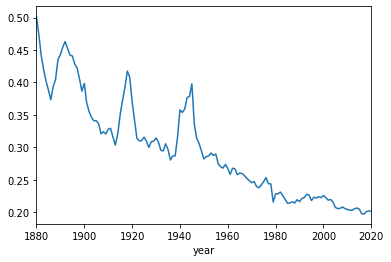

In [160]:
anoms.groupby('year').missed.apply(np.mean).plot()

From the above graph, we found out the the trend of missing value proportion is decreasing. But due to some reason, there exist two summits. We guess these two sudden rise are caused by the first world War and Second World War. This could be easily understand since during that time, it's might be hard to share information across countries.

In [163]:
missing_geo = anoms.groupby(['lat', 'lon']).missed.apply(np.mean).reset_index()

In [ ]:
fig = px.density_mapbox(missing_geo, lat='lat', lon='lon', z='missed', radius=12,
                        center=dict(lat=90, lon=120), zoom=0,
                        mapbox_style="stamen-terrain", range_color=(-0.2, 1))
fig.show()

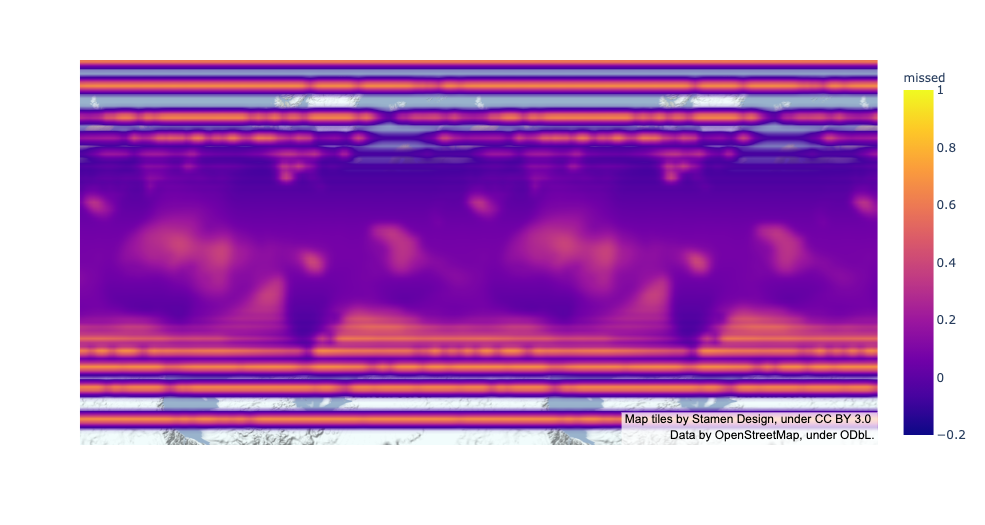

From this graph, we could say the missing value are relevant to the locations. It's might be hard to set observation point at north or south pole.

In a nutshell, there exsits a lot of missing values, one pratical method to fill out those NANs should be use the K-nearest neighours. 

### Generate Relavent Distance in the map, we will use Euclidean Distance between two points as a approximation.

We transform the latitude $\phi$ and longitude $\theta$ into 3-D Euclidean Space with follow formula
$$x = sin(\phi\pi / 180)$$
$$y = cos(\theta\pi / 180)$$
$$z = sin(\theta\pi / 180)$$

In [187]:
def transfer_cord(lat_phi, long_theta):
    x = np.sin(lat_phi / 180 * np.pi)
    y = np.cos(long_theta / 180 * np.pi)
    z = np.sin(long_theta / 180 * np.pi)
    return x, y, z
def get_distance(cord_one, cord_two):
    x1, y1, z1 = transfer_cord(*cord_one)
    x2, y2, z2 = transfer_cord(*cord_two)
    return abs(x1 - x2) ** 2 + abs(y1 - y2) ** 2 + abs(z1 - z2) ** 2

In [188]:
distance_matrix = {}
coordinates = [(x, y) for x in np.arange(-87.5, 90, 5)
                       for y in np.arange(2.5, 360, 5)]
for cord_one in coordinates:
    for cord_two in coordinates:
        if cord_one == cord_two:
            continue
        distance = get_distance(cord_one, cord_two)
        distance_matrix.setdefault(cord_one, []).append((distance, cord_two))

for cord in distance_matrix:
    distance_matrix[cord].sort()

In [246]:
def knn_fillna(cord, neighs_anoms, k):
    cands = []
    neighs = distance_matrix[cord]
    for _, neigh in neighs:
        if neigh in neighs_anoms:
            cands.append(neighs_anoms[neigh])
        if len(cands) == k:
            break
    return np.mean(cands)

In [251]:
def fill_miss_value_with_k_nearest(df, k=10):
    neigbours, tofill = {}, {}
    for _, row in df.iterrows():
        lat, lon, anom = row['lat'], row['lon'], row['anom']
        if not np.isnan(anom):
            neigbours[(lat, lon)] = anom
        else:
            tofill[(lat, lon)] = 0
    for key in tofill:
        tofill[key] = knn_fillna(key, neigbours, k)
    neigbours.update(tofill)
    ans = pd.Series(neigbours, name='filled_anom')
    return ans
    

In [252]:
filled_anoms = anoms.groupby(['year', 'month']).apply(fill_miss_value_with_k_nearest)
anoms = filled_anoms.reset_index()
anoms.columns = ['year', 'month', 'lat', 'lon', 'anom']

### After filling out those NANs, we'd like to explore which factors might impace the anomalys.

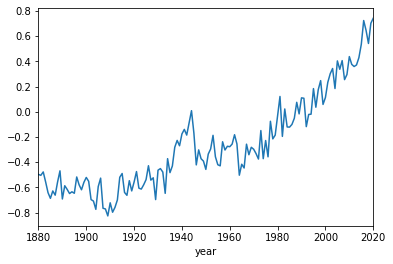

In [268]:
anoms.groupby('year').anom.mean().plot()

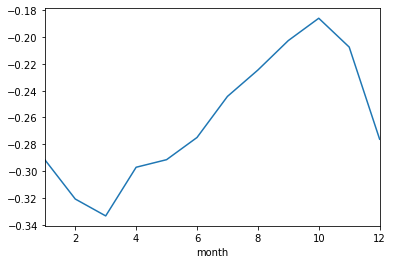

In [269]:
anoms.groupby('month').anom.mean().plot()

## This part illustrate two important facts.

1. The occurance of anomaly is increasing along with time.
2. There exist a periodic trends in the anomaly occurance. According to the figure, we guess this trend would be heavily impacted by temperature.

In [272]:
anoms_geo = anoms.groupby(['lat', 'lon']).anom.mean().reset_index()

In [ ]:
fig = px.density_mapbox(anoms_geo, lat='lat', lon='lon', z='anom', radius=13,
                        center=dict(lat=90, lon=120), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

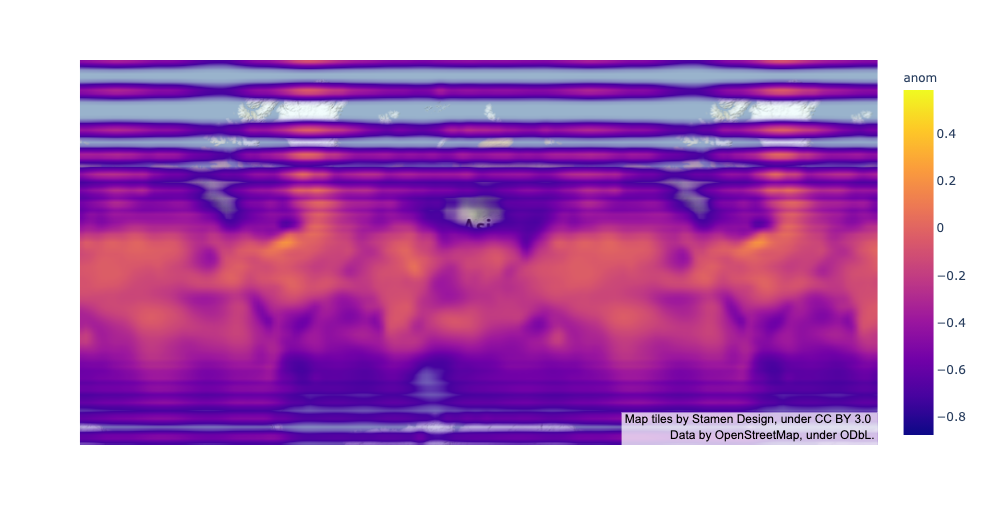

In [299]:
correlation = np.corrcoef(anoms_geo.anom, missing_geo.missed)[0][1]
print('The correlation between anomalys and missing value proportion {:.2f}'.format(correlation))

The correlation between anomalys and missing value proportion -0.16


From this picture, we should say, the geographic featur would be an important factor to the scale of anomalys.
Besides, we've also proved the kind of factor was not affected by filling out missing value since the correlation is -0.16.